In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:/Users/Acer/Desktop/FDS Project/Hotel_Dataset.csv")
df.head()

,CustomerID,Age_Group,Rating(1-5),Hotel,FoodPreference,Bill,NoOfPax,EstimatedSalary,Age_Group.1
0,1,20-25,4,Ibis,veg,1300,2,40000,20-25
1,2,30-35,5,LemonTree,Non-Veg,2000,3,59000,30-35
2,3,25-30,6,RedFox,Veg,1322,2,30000,25-30
3,4,20-25,-1,LemonTree,Veg,1234,2,120000,20-25
4,5,35+,3,Ibis,Vegetarian,989,2,45000,35+


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       11 non-null     int64 
 1   Age_Group        11 non-null     object
 2   Rating(1-5)      11 non-null     int64 
 3   Hotel            11 non-null     object
 4   FoodPreference   11 non-null     object
 5   Bill             11 non-null     int64 
 6   NoOfPax          11 non-null     int64 
 7   EstimatedSalary  11 non-null     int64 
 8   Age_Group.1      11 non-null     object
dtypes: int64(5), object(4)
memory usage: 924.0+ bytes


In [3]:
df.isnull().sum()

CustomerID         0
Age_Group          0
Rating(1-5)        0
Hotel              0
FoodPreference     0
Bill               0
NoOfPax            0
EstimatedSalary    0
Age_Group.1        0
dtype: int64

In [5]:
# 1. Fill numerical missing values with the mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0])

In [8]:
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


Unique Values in Each Column:
CustomerID: [ 1  2  3  4  5  6  7  8  9 10]
Age_Group: ['20-25' '30-35' '25-30' '35+']
Rating(1-5): [ 4  5  6 -1  3  7  2]
Hotel: ['Ibis' 'LemonTree' 'RedFox' 'Ibys']
FoodPreference: ['veg' 'Non-Veg' 'Veg' 'Vegetarian' 'non-Veg']
Bill: [ 1300  2000  1322  1234   989  1909  1000  2999  3456 -6755]
NoOfPax: [  2   3  -1 -10   4]
EstimatedSalary: [ 40000  59000  30000 120000  45000 122220  21122 345673 -99999  87777]
Age_Group.1: ['20-25' '30-35' '25-30' '35+']


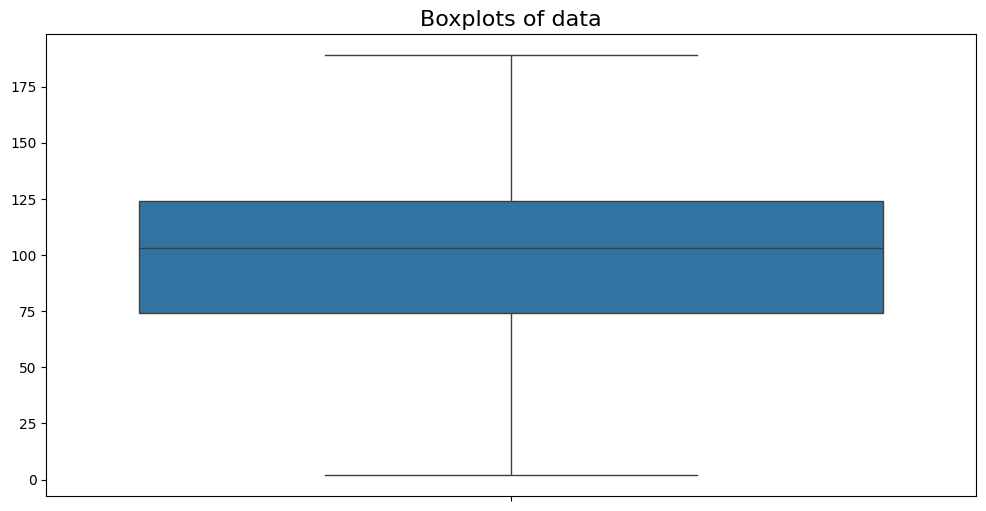

Dataset : [103 180  93  15 107  72 189  21 103 122  75  88 117 100 104 152 131 150
  53   2]


In [12]:
np.random.seed(42)
data=np.random.randint(1,201,size=20)
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.title("Boxplots of data", fontsize=16)
plt.show()
print("Dataset :",data)

In [19]:
!pip install scipy

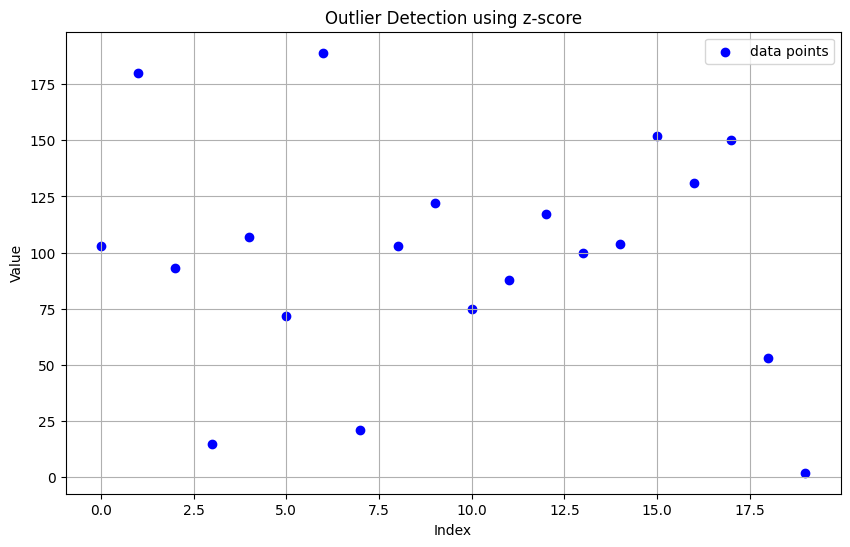

Dataset: [103 180  93  15 107  72 189  21 103 122  75  88 117 100 104 152 131 150
  53   2]
Outliers Detected: []


In [22]:
from scipy.stats import zscore
np.random.seed(42)
data=np.random.randint(1,201,size=20)
z_score=zscore(data)
outliers=data[np.abs(z_score)>3]
plt.figure(figsize=(10,6))
plt.scatter(range(len(data)),data,color="blue",label="data points")
for i,val in enumerate(data):
    if val in outliers:
        plt.scatter(i,val,color="red",label="Outlier" if 'Outlier' not in plt.gca().get_legend_handles_labels()[1] else "")
plt.title("Outlier Detection using z-score")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
print("Dataset:",data)
print("Outliers Detected:",outliers)

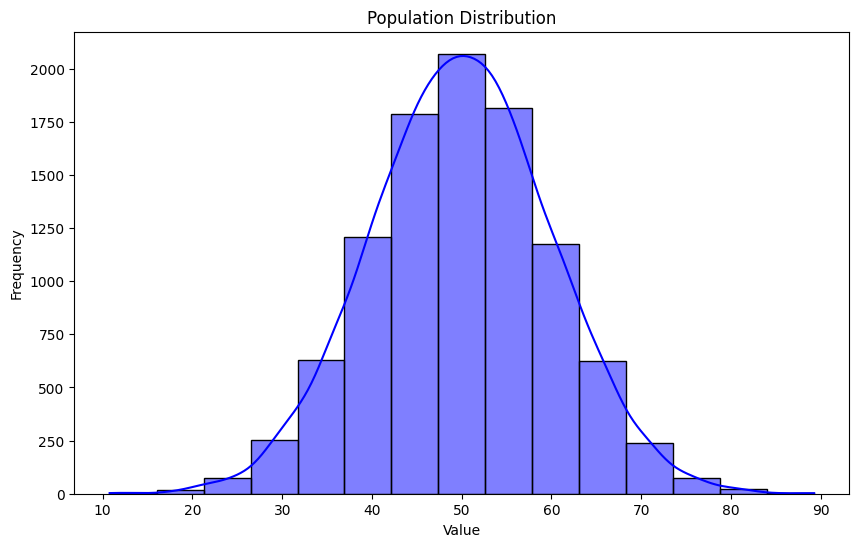

In [23]:
np.random.seed(42)
population=np.random.normal(loc=50,scale=10,size=10000)
plt.figure(figsize=(10,6))
sns.histplot(population,kde="True",color='blue',bins=15)
plt.title("Population Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

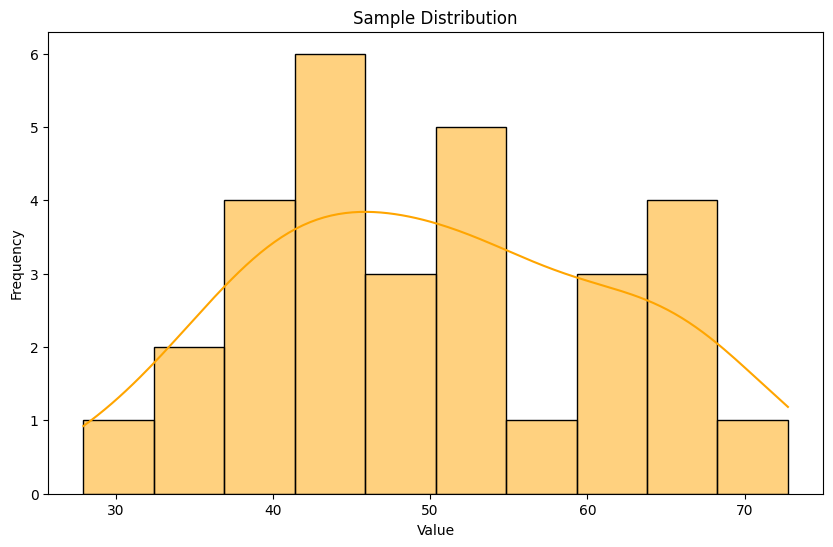

In [24]:
sample_size=30
sample=np.random.choice(population,size=sample_size)
plt.figure(figsize=(10, 6))
sns.histplot(sample, kde=True, color='orange', bins=10)
plt.title('Sample Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

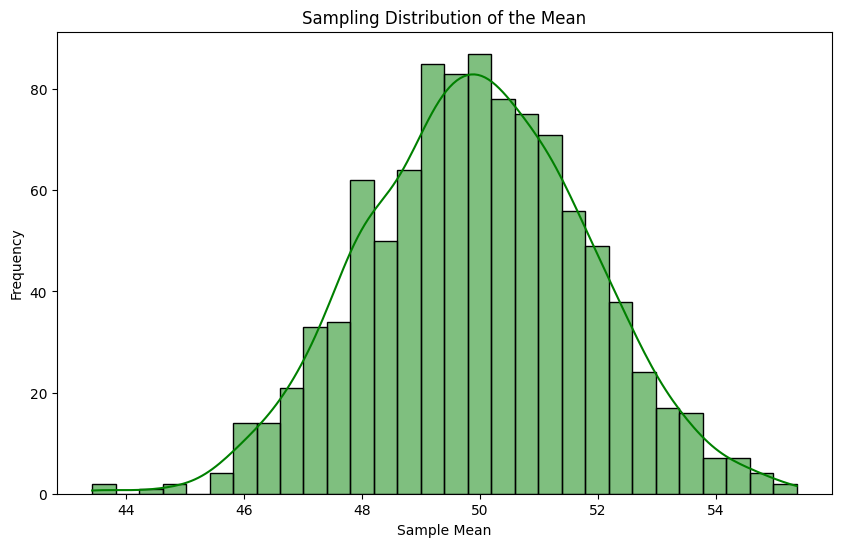

Mean of Sampling Distribution: 49.940474234398216
Standard Deviation of Sampling Distribution: 1.8637809440342847


In [26]:
num_samples = 1000
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, color='green', bins=30)
plt.title('Sampling Distribution of the Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()
print("Mean of Sampling Distribution:", np.mean(sample_means))
print("Standard Deviation of Sampling Distribution:", np.std(sample_means))


In [27]:
population_std = np.std(population)
standard_error = population_std / np.sqrt(sample_size)

print("Population Mean:", np.mean(population))
print("Population Standard Deviation:", population_std)
print("Theoretical Standard Error:", standard_error)

Population Mean: 49.97864016631574
Population Standard Deviation: 10.034122061299875
Theoretical Standard Error: 1.8319716659113923


In [29]:
import numpy as np
from scipy.stats import ttest_1samp
weights = np.array([152, 148, 151, 149, 147, 153, 150, 148, 152, 149, 151, 
                    150, 149, 152, 151, 148, 150, 152, 149, 150, 148, 153,
                    151, 150, 149, 152, 148, 151, 150, 153])
t_statistic, p_value = ttest_1samp(weights, popmean=150)
alpha = 0.05
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: The average weight of the birds differs from 150 grams.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the average weight differs from 150 grams.")


T-Statistic: 0.6406070234476979
P-Value: 0.5268080418522076
Fail to reject the null hypothesis: There is no significant evidence that the average weight differs from 150 grams.


In [30]:
import numpy as np
from scipy.stats import ttest_1samp

# Generate random IQ scores for 25 students
np.random.seed(42)  # For reproducibility
iq_scores = np.random.normal(loc=100, scale=10, size=25)  # Mean=100, Std=10, Size=25

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(iq_scores, popmean=100)

# Significance level
alpha = 0.05

# Display results
print("Generated IQ Scores:", iq_scores)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: The average IQ score differs significantly from 100.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the average IQ score differs from 100.")



Generated IQ Scores: [104.96714153  98.61735699 106.47688538 115.23029856  97.65846625
  97.65863043 115.79212816 107.67434729  95.30525614 105.42560044
  95.36582307  95.34270246 102.41962272  80.86719755  82.75082167
  94.37712471  89.8716888  103.14247333  90.91975924  85.87696299
 114.65648769  97.742237   100.67528205  85.75251814  94.55617275]
T-Statistic: -0.8546732349237881
P-Value: 0.40118343292549175
Fail to reject the null hypothesis: No significant evidence that the average IQ score differs from 100.


In [31]:
import numpy as np
from scipy.stats import f_oneway

# Generate random growth data for 25 plants under three treatments
np.random.seed(42)  # For reproducibility
growth_a = np.random.normal(loc=15, scale=2, size=25)  # Mean=15, Std=2, Size=25
growth_b = np.random.normal(loc=14, scale=2, size=25)  # Mean=14, Std=2, Size=25
growth_c = np.random.normal(loc=13, scale=2, size=25)  # Mean=13, Std=2, Size=25

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(growth_a, growth_b, growth_c)

# Significance level
alpha = 0.05

# Display results
print("Generated Growth Data for Treatment A:", growth_a)
print("Generated Growth Data for Treatment B:", growth_b)
print("Generated Growth Data for Treatment C:", growth_c)
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: Significant differences exist in mean growth among the treatments.")
else:
    print("Fail to reject the null hypothesis: No significant differences in mean growth among the treatments.")


Generated Growth Data for Treatment A: [15.99342831 14.7234714  16.29537708 18.04605971 14.53169325 14.53172609
 18.15842563 16.53486946 14.06105123 16.08512009 14.07316461 14.06854049
 15.48392454 11.17343951 11.55016433 13.87542494 12.97433776 15.62849467
 13.18395185 12.1753926  17.93129754 14.5484474  15.13505641 12.15050363
 13.91123455]
Generated Growth Data for Treatment B: [14.22184518 11.69801285 14.75139604 12.79872262 13.4166125  12.79658678
 17.70455637 13.97300555 11.88457814 15.64508982 11.5583127  14.41772719
 10.08065975 11.3436279  14.39372247 15.47693316 14.34273656 13.76870344
 13.39779261 11.04295602 12.56031158 13.07872246 16.11424445 14.68723658
 10.47391969]
Generated Growth Data for Treatment C: [13.64816794 12.22983544 11.646156   14.22335258 15.06199904 14.86256024
 11.32156495 12.38157525 13.66252686 14.95109025 12.04165152 12.62868205
 10.78733005 10.60758675 14.62505164 15.71248006 12.85597976 15.0070658
 13.72327205 11.70976049 13.72279121 16.07607313 12.9

In [32]:
#Demonstrate Quantitative and Qualitative plots using tips inbuilt dataset in Jupyter Notebook
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


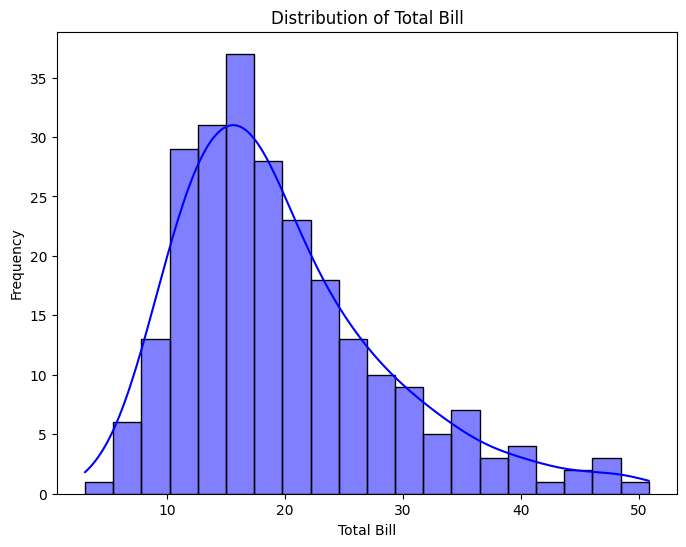

In [33]:
#Quantitative Plots - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(tips['total_bill'], kde=True, color='blue', bins=20)
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()

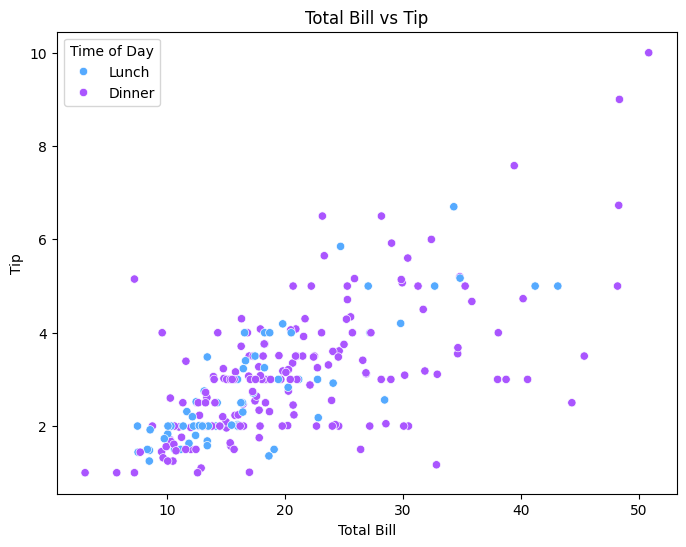

In [34]:
#Quantitative Plots - scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='time', palette='cool')
plt.title("Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend(title="Time of Day")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_59600\1758985253.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day', y='tip', data=tips,ci=None,palette='viridis')
C:\Users\Acer\AppData\Local\Temp\ipykernel_59600\1758985253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='tip', data=tips,ci=None,palette='viridis')


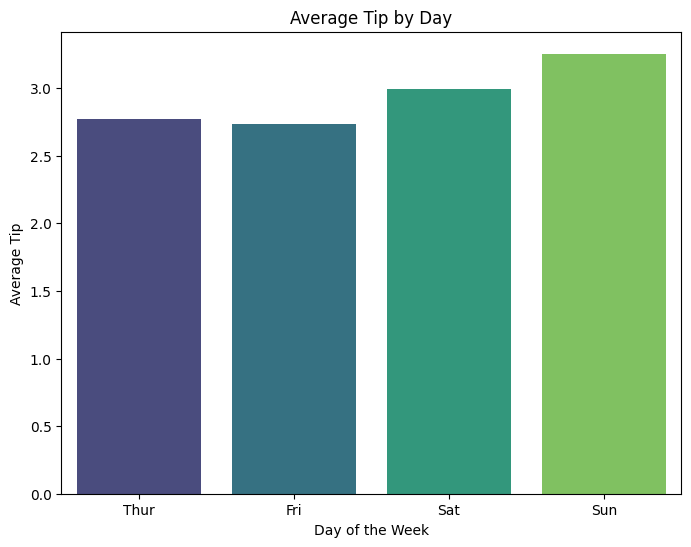

In [37]:
#Qualitative Plots - Barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='tip', data=tips,ci=None,palette='viridis')
plt.title("Average Tip by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Average Tip")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_59600\3924043699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=tips,palette='muted')


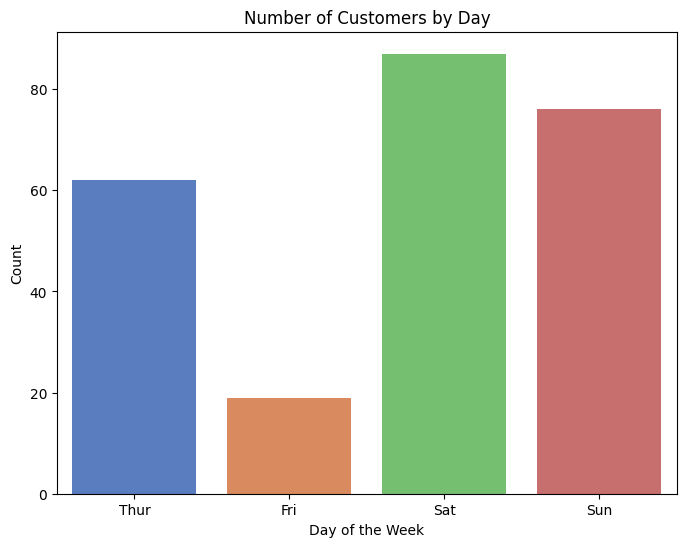

In [41]:
# Count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='day', data=tips,palette='muted')
plt.title("Number of Customers by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_59600\1625745442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='total_bill', data=tips, palette='pastel')


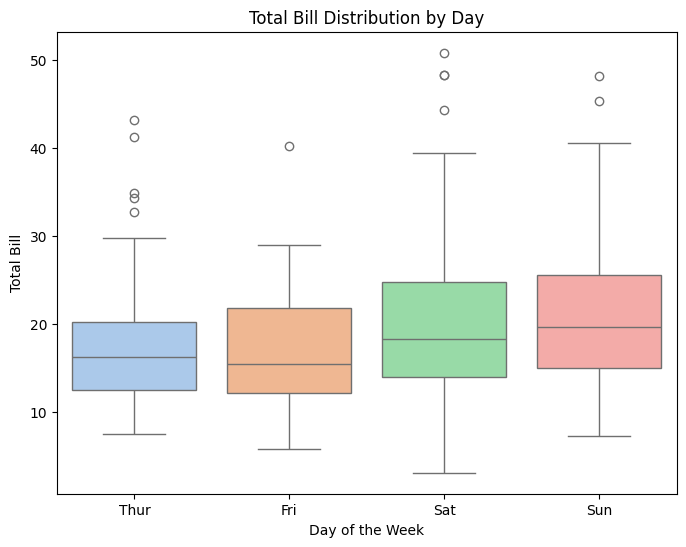

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='total_bill', data=tips, palette='pastel')
plt.title("Total Bill Distribution by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_59600\75194098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='time', y='tip', data=tips, palette='cool')


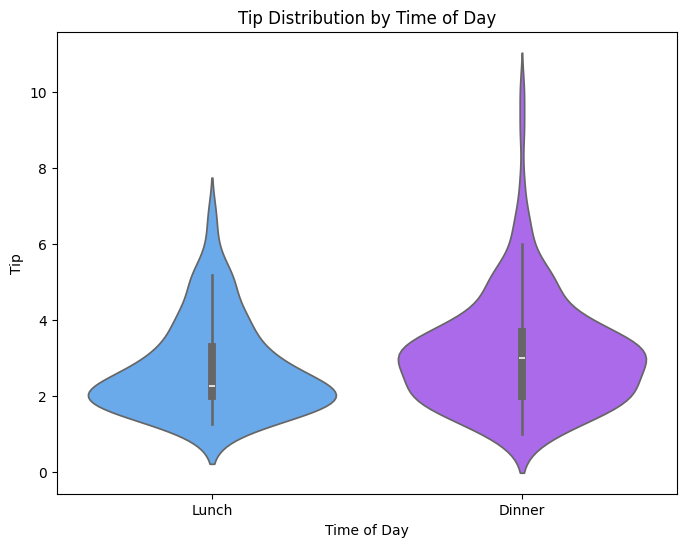

In [43]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='time', y='tip', data=tips, palette='cool')
plt.title("Tip Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Tip")
plt.show()